[1.1 Load data from csv file](#1.1-Load-data-from-csv-file) 

[1.2 Use `Shapely` to visualise LineStrings from `the_geom` column](#1.2-Use-Shapely-to-visualise-LineStrings-from-the_geom-column)

[1.3 Visualize all values from the_geom column on one plot](#1.3-Visualize-all-values-from-the_geom-column-on-one-plot)

[1.4 Create geometry column by loading LineStrings from the_geom column as Shapely objects](#1.4-Create-geometry-column-by-loading-LineStrings-from-the_geom-column-as-Shapely-objects)
- [1.4.1 Plot the results](#1.4.1-Plot-the-results)

[1.5 With the use of `osmnx` create visualisation of San Francisco](#1.5-With-the-use-of-osmnx-create-visualisation-of-San-Francisco)
- [1.5.1 Load graph of the city fom `osmnx`](#1.5.1-Load-graph-of-the-city-fom-osmnx)
- [1.5.2 Show city visualisation with the use of  `ox` graph](#1.5.2-Show-city-visualisation-with-the-use-of--ox-graph)

[1.6 Retrieve nodes and edges from San Francisco graph](#1.6-Retrieve-nodes-and-edges-from-San-Francisco-graph)
- [1.6.1 Visualize all nodes on the map](#1.6.1-Visualize-all-nodes-on-the-map)
- [1.6.2 Analyse edges information](#1.6.2-Analyse-edges-information)
- [1.6.3 Visualize San Francisco streets](#1.6.3-Visualize-San-Francisco-streets)

[1.7 Plot `Speed limit compliance in San Francisco` data on San Francisco map](#1.7-Plot-Speed-limit-compliance-in-San-Francisco-data-on-San-Francisco-map)

[1.8 Find a way to join edges with the `Speed limit compliance in SF` dataset](#1.8-Find-a-way-to-join-edges-with-the-Speed-limit-compliance-in-SF-dataset)
- [1.8.1 Quick glimpse on the geometrical data](#1.8.1-Quick-glimpse-on-the-geometrical-data)
- [1.8.2 Try to join speed limit compliance data with the edges data by performing spatial join](#1.8.2-Try-to-join-speed-limit-compliance-data-with-the-edges-data-by-performing-spatial-join.)
- [1.8.3 Show joined data on the plot](#1.8.3-Show-joined-data-on-the-plot.)

[1.9 Join osmnx edges with Speed compliance data by the street column](#1.9-Join-osmnx-edges-with-Speed-compliance-data-by-the-street-column.)

[1.10 Next approach to data joining](#1.10-Next-approach-to-data-joining)
- [1.10.1 Join attempt result](#1.10.1-Join-attempt-result)

[1.11 Join data by name of the street](#1.11-Join-data-by-name-of-the-street)
- [1.11.1 Further data matching](#1.11.1-Further-data-matching)
- [1.11.2 Plot the result of joining by the streetname](#1.11.2-Plot-the-result-of-joining-by-the-streetname)

##### Imports

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
# Linestring visualisation
import shapely.geometry
import shapely.wkt
from shapely import wkt
from shapely.geometry import LineString

# osmnx
import pandas as pd
import osmnx as ox

# 1. Dataset analysis

## 1.1 Load data from csv file

In [2]:
gdf = gpd.read_file("data/SanFranciscoSpeedLimitCompliance.csv")
gdf.crs = 'epsg:4326'

In [3]:
# take a look on the data
gdf

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,None
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,None
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,None
...,...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16,1,26.2,32.31,37,None
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16,1,26.2,32.31,37,None
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16,1,26.2,32.31,37,None
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18,0,25.1,32,0,None


### 1.2 Use `Shapely` to visualise LineStrings from `the_geom` column
At the beginning we had no clue how to interpret `LineString` values from `the_geom` column. <br> We found the way to visualise those objects with `shapely`. Finally, we came to the conclusion that each LineString is part of the street!

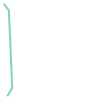

In [4]:
shapely.wkt.loads(gdf.the_geom[5])

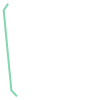

In [5]:
pol1 = shapely.wkt.loads(gdf.the_geom[4])
pol1

### 1.3 Visualize all values from `the_geom` column on one plot
All values from `the_geom` column grouped on one plot reminds San Francisco shape. 

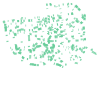

In [6]:
line = shapely.geometry.MultiLineString([shapely.wkt.loads(x) for x in gdf.the_geom])
line

### 1.4 Create `geometry` column by loading LineStrings from `the_geom` column as Shapely objects
As we knew what those LineStrings mean it was possible to create new column `geometry` containing `shapely` objects instead of simple strings.

<!-- By default GeoPandas plots GeoDataFrame based on the `geometry` column. -->

In [7]:
gdf['geometry'] = gdf.the_geom.apply(lambda x: shapely.wkt.loads(x) if x else GeometryCollection())
gdf.crs = {'init' : 'epsg:4326'}

E:\Anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CNN         613 non-null    object  
 1   the_geom    613 non-null    object  
 2   SpeedLimit  613 non-null    object  
 3   STREETNAME  613 non-null    object  
 4   Over_pct    613 non-null    object  
 5   O5mph_pct   613 non-null    object  
 6   Speed_avg   613 non-null    object  
 7   SpeedO_avg  613 non-null    object  
 8   Spd5O_avg   613 non-null    object  
 9   geometry    613 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 48.0+ KB


### 1.4.1 Plot the results

<AxesSubplot:>

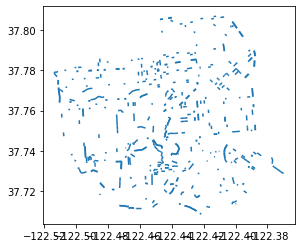

In [9]:
gdf.plot()

## 1.5 With the use of `osmnx` create visualisation of San Francisco
In this step we loaded San Francisco city information from `osmnx`.

In [10]:
place_name = 'San Francisco, California'

### 1.5.1 Load graph of the city fom `osmnx`  

In [11]:
G = ox.graph_from_place(place_name, network_type='drive')

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


### 1.5.2 Show city visualisation with the use of  `ox` graph

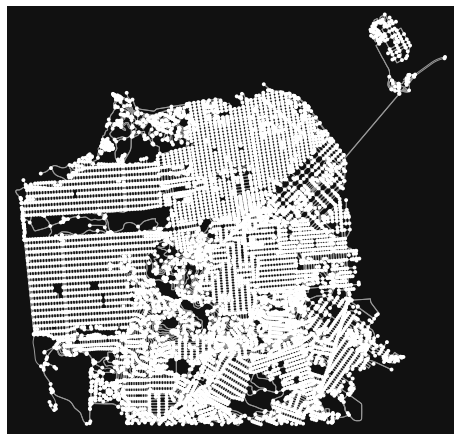

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
ox.plot_graph(G)

In [13]:
G

## 1.6 Retrieve nodes and edges from San Francisco graph
It's possible to retrieve nodes and edges from city graph. Edges where the thing we were looking for - those where records associated with city streets.

In [14]:
nodes, edges = ox.graph_to_gdfs(G)

In [15]:
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.39094 37.78592)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.42412 37.73135)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.41326 37.73271)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.40345 37.80504)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.41648 37.79905)


In [16]:
nodes.crs = 'epsg:3395'

### 1.6.1 Visualize all nodes on the map

<AxesSubplot:>

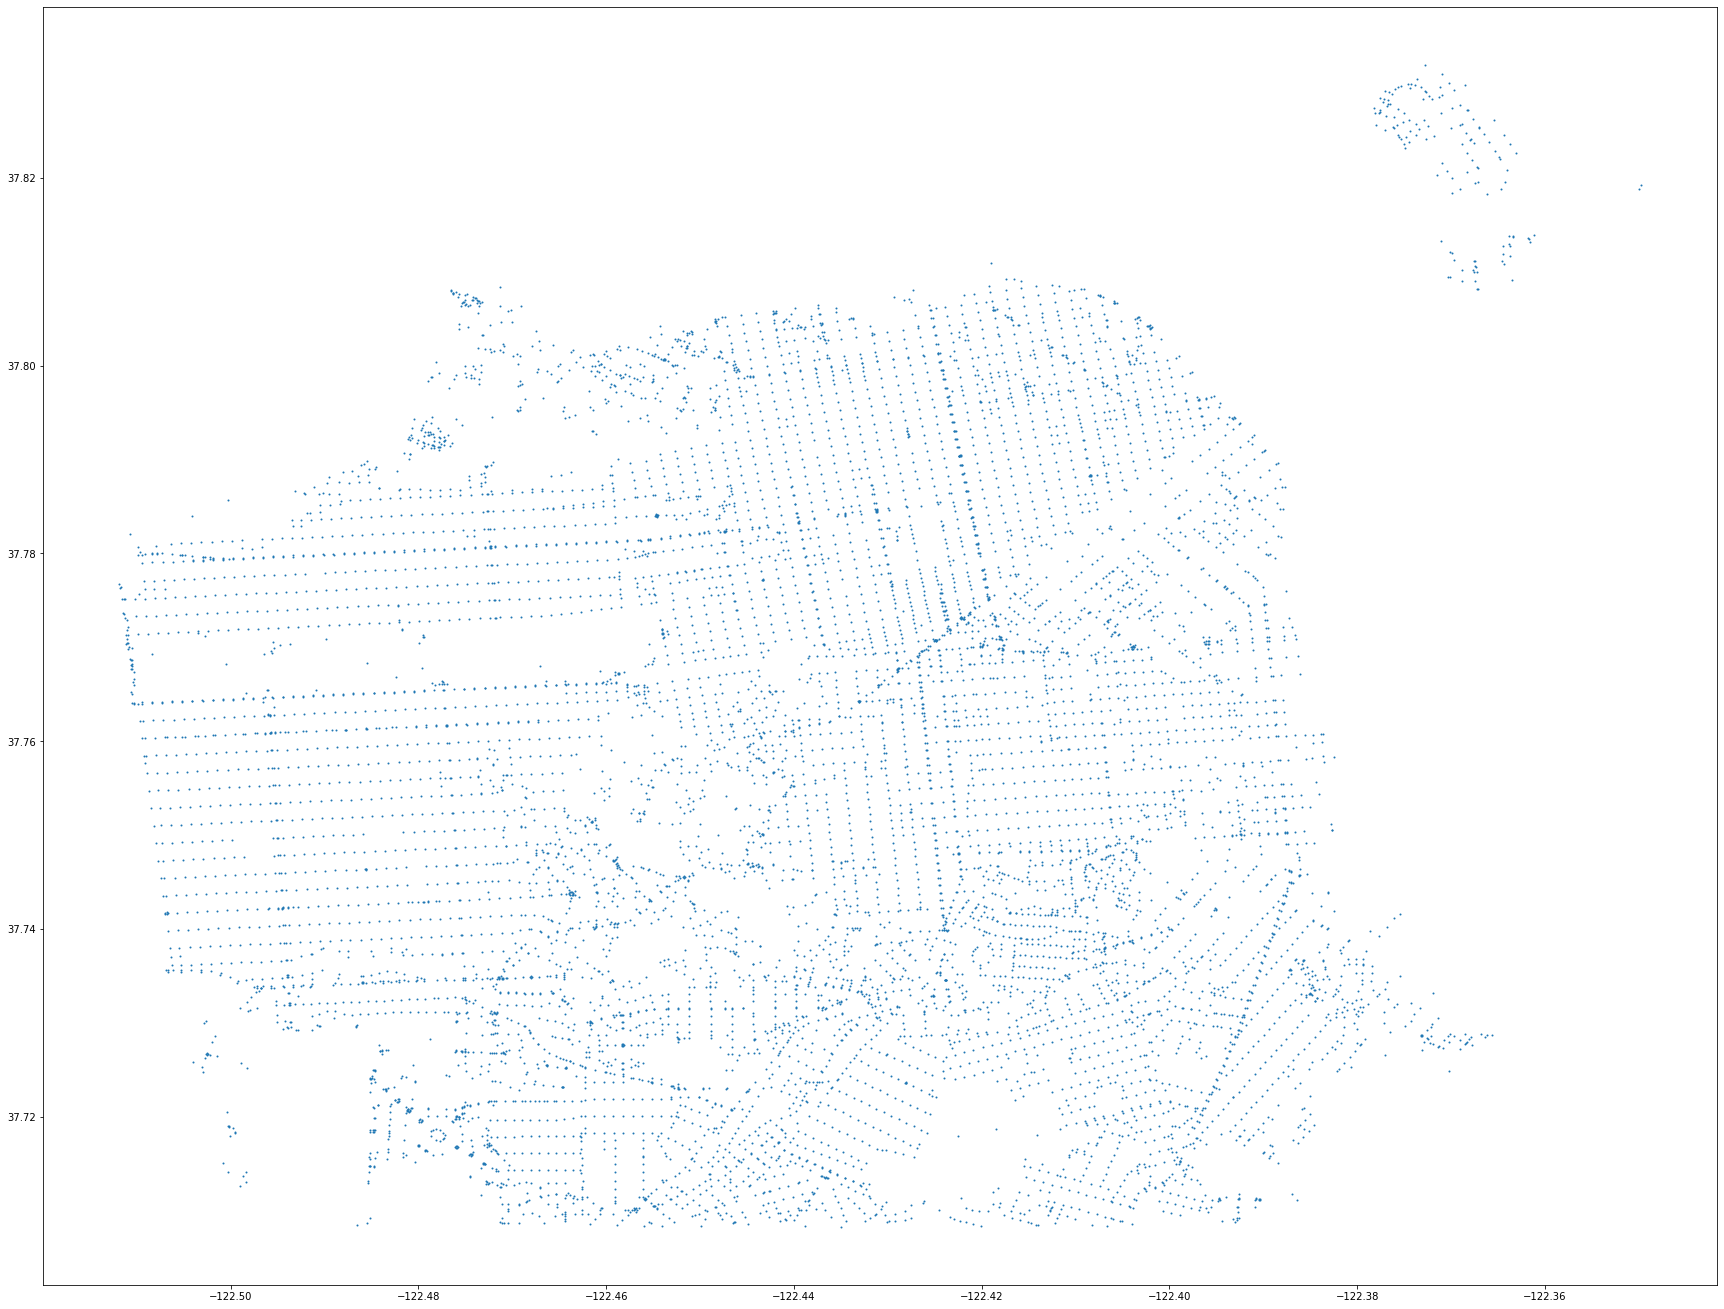

In [17]:
nodes.plot(markersize=1 ,figsize=(30, 30))

In [18]:
# take a loook at the nodes
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
32927563,37.785921,-122.390945,3,NaN,NaN,POINT (-122.391 37.786)
32927591,37.731353,-122.424124,3,53,motorway_junction,POINT (-122.424 37.731)
32927645,37.732706,-122.413261,3,54B,motorway_junction,POINT (-122.413 37.733)
33241803,37.805042,-122.403450,5,NaN,traffic_signals,POINT (-122.403 37.805)
33242031,37.799054,-122.416484,1,NaN,NaN,POINT (-122.416 37.799)


In [19]:
# take a loook at the edges
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  
u        v          key                                       
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN  
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN  
         6469349533 0      NaN      NaN     NaN   NaN    NaN  
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN  
         766946830  0      NaN      NaN     NaN   NaN    NaN

### 1.6.2 Analyse edges information
Edges contains interesting information such as:
 * is street oneway
 * number of lines
 * length
 * type of street
 * maxspeed <br>
 and more.

In [20]:
edges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 26863 entries, (32927563, 645559609, 0) to (9806820065, 65299159, 0)
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     26863 non-null  object  
 1   oneway    26863 non-null  bool    
 2   lanes     8904 non-null   object  
 3   ref       420 non-null    object  
 4   name      26173 non-null  object  
 5   highway   26863 non-null  object  
 6   maxspeed  5800 non-null   object  
 7   length    26863 non-null  float64 
 8   bridge    243 non-null    object  
 9   geometry  26863 non-null  geometry
 10  access    328 non-null    object  
 11  junction  174 non-null    object  
 12  service   5 non-null      object  
 13  width     72 non-null     object  
 14  tunnel    24 non-null     object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 3.7+ MB


### 1.6.3 Visualize San Francisco streets
In the dataset each `edge` corresponds to the street of San Franisco. The San Francisco infrastructure looks interesting when plotted.

<AxesSubplot:>

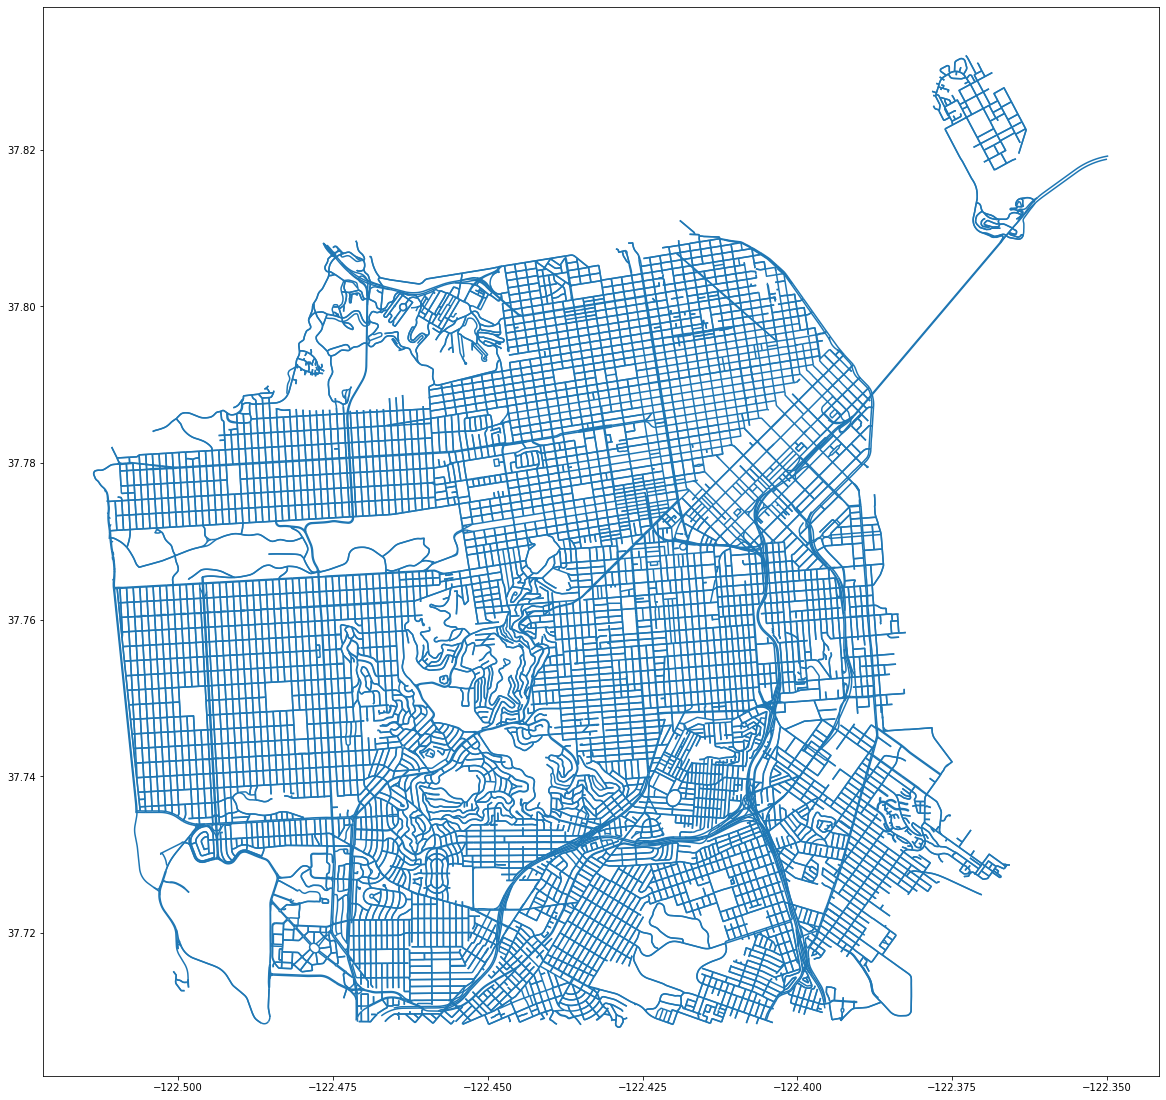

In [21]:
edges.plot(markersize=1 ,figsize=(20, 20))

## 1.7 Plot `Speed limit compliance in San Francisco` data on San Francisco map
There are following components on the map:
- edges (dark blue lines), which means streets
- nodes (black dots)

`Red lines` on the map are associated with the streets of which information about Speed limit compliances is stored in the loaded dataset.

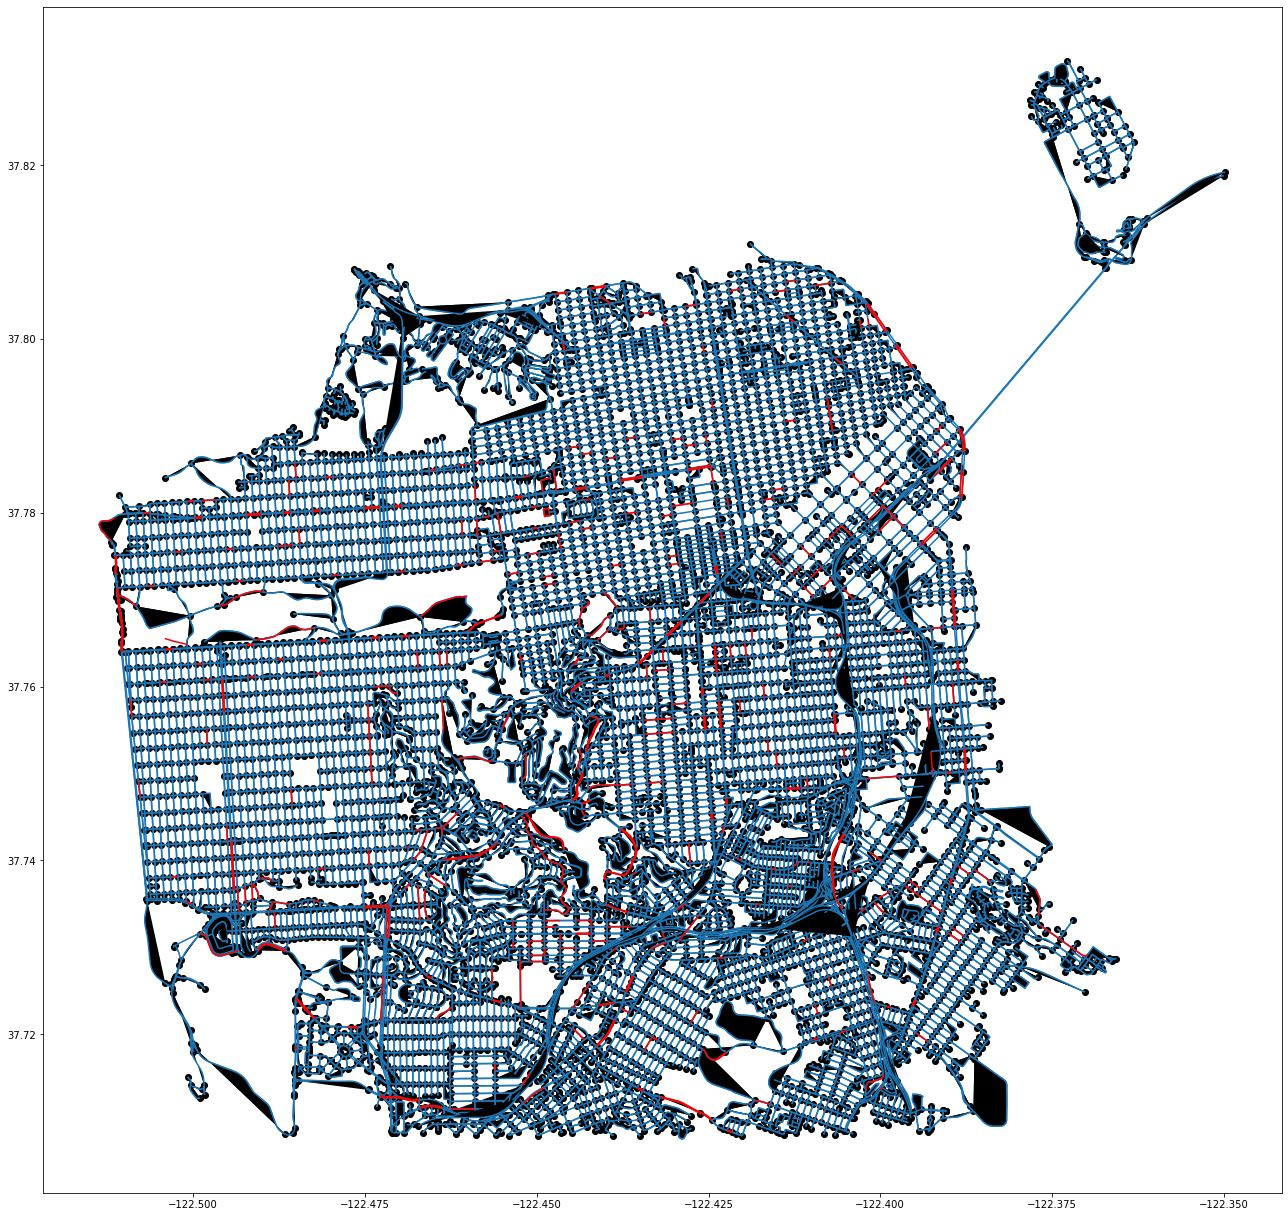

In [22]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
edges.plot(ax=ax, facecolor='black')
nodes.plot(ax=ax, facecolor='black')
gdf.plot(ax=ax, color='red')
plt.tight_layout()

## 1.8 Find a way to join edges with the `Speed limit compliance in SF` dataset
 We try to find mutual column to perform spatial join on the edges and San Francisco speedlimit compliance data.


In [23]:
edges.head()

osmid  \
u        v          key                                                      
32927563 645559609  0                     [50690291, 179235221, 661905446]   
32927591 315706881  0                                             28715659   
         6469349533 0                                            689603997   
32927645 65331336   0                        [28846637, 8918870, 61424023]   
         766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   

                         oneway lanes    ref  \
u        v          key                        
32927563 645559609  0      True     5   I 80   
32927591 315706881  0      True     1    NaN   
         6469349533 0      True     4  I 280   
32927645 65331336   0      True     2  I 280   
         766946830  0      True     2    NaN   

                                                       name        highway  \
u        v          key                                                      
32927563 645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591 315706881  0                                   NaN  motorway_link   
         6469349533 0                  John F Foran Freeway       motorway   
32927645 65331336   0          Southern Embarcadero Freeway       motorway   
         766946830  0                                   NaN  motorway_link   

                        maxspeed    length bridge  \
u        v          key                             
32927563 645559609  0     50 mph  3232.712    yes   
32927591 315706881  0        NaN   333.165    NaN   
         6469349533 0     65 mph   794.493    NaN   
32927645 65331336   0     65 mph  1196.665    yes   
         766946830  0     50 mph  1174.585    yes   

                                                                  geometry  \
u        v          key                                                      
32927563 645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591 315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
         6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645 65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
         766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   

                        access junction service width tunnel  
u        v          key                                       
32927563 645559609  0      NaN      NaN     NaN   NaN    NaN  
32927591 315706881  0      NaN      NaN     NaN   NaN    NaN  
         6469349533 0      NaN      NaN     NaN   NaN    NaN  
32927645 65331336   0      NaN      NaN     NaN   NaN    NaN  
         766946830  0      NaN      NaN     NaN   NaN    NaN

In [24]:
gdf.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39032 37.78813, -122.39118 37..."
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37..."
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37..."
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37..."
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37..."


### 1.8.1 Quick glimpse on the geometrical data

Take a look at the geographical data stored in the gdf and edges datasets. Both of them contains LineStrings which can be shown on the plot with GeoPandas.

In [25]:
gdf.geometry

0      LINESTRING (-122.39032 37.78813, -122.39118 37...
1      LINESTRING (-122.39118 37.78746, -122.39205 37...
2      LINESTRING (-122.39962 37.78079, -122.40184 37...
3      LINESTRING (-122.38776 37.75284, -122.38768 37...
4      LINESTRING (-122.38776 37.75284, -122.38782 37...
                             ...                        
608    LINESTRING (-122.41161 37.77622, -122.41107 37...
609    LINESTRING (-122.41107 37.77579, -122.41061 37...
610    LINESTRING (-122.41061 37.77543, -122.41006 37...
611    LINESTRING (-122.40852 37.77376, -122.40843 37...
612    LINESTRING (-122.40542 37.77130, -122.40388 37...
Name: geometry, Length: 613, dtype: geometry

In [26]:
edges.geometry

u           v           key
32927563    645559609   0      LINESTRING (-122.39094 37.78592, -122.39068 37...
32927591    315706881   0      LINESTRING (-122.42412 37.73135, -122.42362 37...
            6469349533  0      LINESTRING (-122.42412 37.73135, -122.42396 37...
32927645    65331336    0      LINESTRING (-122.41326 37.73271, -122.41224 37...
            766946830   0      LINESTRING (-122.41326 37.73271, -122.41217 37...
                                                     ...                        
9702068036  9702068018  0      LINESTRING (-122.36740 37.81046, -122.36744 37...
9702068053  65339934    0      LINESTRING (-122.37011 37.81214, -122.37018 37...
            65353407    0      LINESTRING (-122.37011 37.81214, -122.37001 37...
            9702068031  0      LINESTRING (-122.37011 37.81214, -122.37048 37...
9806820065  65299159    0      LINESTRING (-122.45522 37.74067, -122.45507 37...
Name: geometry, Length: 26863, dtype: geometry

### 1.8.2 Try to join speed limit compliance data with the edges data by performing spatial join.
A [spatial join](https://geopandas.org/en/stable/gallery/spatial_joins.html) uses binary predicates such as intersects and crosses to combine two GeoDataFrames based on the spatial relationship between their geometries. <br>
In our case we chose to do intersection of the streets from both datasets.

In [27]:
join_result = gdf.sjoin(edges, how="inner", predicate='intersects')

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


Show infromation of the result DataFrame.

In [28]:
join_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1418 entries, 1 to 612
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CNN           1418 non-null   object  
 1   the_geom      1418 non-null   object  
 2   SpeedLimit    1418 non-null   object  
 3   STREETNAME    1418 non-null   object  
 4   Over_pct      1418 non-null   object  
 5   O5mph_pct     1418 non-null   object  
 6   Speed_avg     1418 non-null   object  
 7   SpeedO_avg    1418 non-null   object  
 8   Spd5O_avg     1418 non-null   object  
 9   geometry      1418 non-null   geometry
 10  index_right0  1418 non-null   int64   
 11  index_right1  1418 non-null   int64   
 12  index_right2  1418 non-null   int64   
 13  osmid         1418 non-null   object  
 14  oneway        1418 non-null   bool    
 15  lanes         586 non-null    object  
 16  ref           21 non-null     object  
 17  name          1361 non-null   object  
 18  h

In [29]:
join_result.head()

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,name,highway,maxspeed,length,bridge,access,junction,service,width,tunnel
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37...",...,Beale Street,residential,NaN,385.207,NaN,NaN,NaN,NaN,NaN,NaN
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.4,33.76,38.32,"LINESTRING (-122.39118 37.78746, -122.39205 37...",...,Beale Street,residential,NaN,385.207,NaN,NaN,NaN,NaN,NaN,NaN
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,NaN,motorway_link,50 mph,371.837,yes,NaN,NaN,NaN,NaN,NaN
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,4th Street,secondary,NaN,65.148,NaN,NaN,NaN,NaN,NaN,NaN
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,4th Street,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN


### 1.8.3 Show joined data on the plot.

<AxesSubplot:>

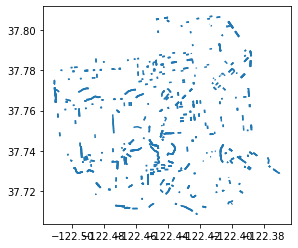

In [30]:
join_result.plot()

## 1.9 Join osmnx edges with Speed compliance data by the street column.

In [31]:
ox.save_graph_xml(G, filepath='./data/graph.osm')
SFgraph = ox.geometries.geometries_from_xml('./data/graph.osm')
SFgraph.crs = 'epsg:4326'
SFgraph

E:\Anaconda3\envs\ox\lib\site-packages\osmnx\osm_xml.py:182: UserWarning: In order for save_graph_xml to behave properly the graph must have been created with the `all_oneway` setting set to True.
  warnings.warn(msg)


highway  \
element_type osmid                         
node         32927563                nan   
             32927591  motorway_junction   
             32927645  motorway_junction   
             33241803    traffic_signals   
             33242031                nan   
...                                  ...   
way          9995              secondary   
             9996            residential   
             9997            residential   
             9998              secondary   
             9999              secondary   

                                                                geometry  \
element_type osmid                                                         
node         32927563                        POINT (-122.39094 37.78592)   
             32927591                        POINT (-122.42412 37.73135)   
             32927645                        POINT (-122.41326 37.73271)   
             33241803                        POINT (-122.40345 37.80504)   
             33242031                        POINT (-122.41648 37.79905)   
...                                                                  ...   
way          9995      LINESTRING (-122.46970 37.73479, -122.46882 37...   
             9996      LINESTRING (-122.46715 37.73491, -122.46703 37...   
             9997      LINESTRING (-122.46715 37.73491, -122.46731 37...   
             9998      LINESTRING (-122.46715 37.73491, -122.46627 37...   
             9999      LINESTRING (-122.46715 37.73491, -122.46785 37...   

                                       nodes lanes maxspeed  \
element_type osmid                                            
node         32927563                    NaN   NaN      NaN   
             32927591                    NaN   NaN      NaN   
             32927645                    NaN   NaN      NaN   
             33241803                    NaN   NaN      NaN   
             33242031                    NaN   NaN      NaN   
...                                      ...   ...      ...   
way          9995       [65314788, 65291599]     2      nan   
             9996      [65314792, 258755842]   nan      nan   
             9997       [65314792, 65329950]   nan      nan   
             9998       [65314792, 65309852]     2      nan   
             9999      [65314792, 315429027]     2      nan   

                                          name oneway  
element_type osmid                                     
node         32927563                      NaN    NaN  
             32927591                      NaN    NaN  
             32927645                      NaN    NaN  
             33241803                      NaN    NaN  
             33242031                      NaN    NaN  
...                                        ...    ...  
way          9995      Saint Francis Boulevard     no  
             9996               San Benito Way     no  
             9997               San Benito Way     no  
             9998      Saint Francis Boulevard     no  
             9999      Saint Francis Boulevard     no  

[36488 rows x 7 columns]

In [32]:
SFgraph.reset_index(inplace=True)
SFgraph

,element_type,osmid,highway,geometry,nodes,lanes,maxspeed,name,oneway
0,node,32927563,nan,POINT (-122.39094 37.78592),NaN,NaN,NaN,NaN,NaN
1,node,32927591,motorway_junction,POINT (-122.42412 37.73135),NaN,NaN,NaN,NaN,NaN
2,node,32927645,motorway_junction,POINT (-122.41326 37.73271),NaN,NaN,NaN,NaN,NaN
3,node,33241803,traffic_signals,POINT (-122.40345 37.80504),NaN,NaN,NaN,NaN,NaN
4,node,33242031,nan,POINT (-122.41648 37.79905),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36483,way,9995,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,nan,Saint Francis Boulevard,no
36484,way,9996,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,nan,San Benito Way,no
36485,way,9997,residential,"LINESTRING (-122.46715 37.73491, -122.46731 37...","[65314792, 65329950]",nan,nan,San Benito Way,no
36486,way,9998,secondary,"LINESTRING (-122.46715 37.73491, -122.46627 37...","[65314792, 65309852]",2,nan,Saint Francis Boulevard,no


Limit all records of San Francisco graph to those which element type is `way`

In [33]:
ways = SFgraph.loc[SFgraph['element_type'] =='way']
ways

,element_type,osmid,highway,geometry,nodes,lanes,maxspeed,name,oneway
9654,way,0,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50 mph,San Francisco – Oakland Bay Bridge,yes
9655,way,1,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,nan,nan,yes
9656,way,10,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['3', '2']",nan,4th Street,no
9657,way,100,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,nan,12th Avenue,no
9658,way,1000,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,nan,Roanoke Street,no
...,...,...,...,...,...,...,...,...,...
36483,way,9995,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,nan,Saint Francis Boulevard,no
36484,way,9996,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,nan,San Benito Way,no
36485,way,9997,residential,"LINESTRING (-122.46715 37.73491, -122.46731 37...","[65314792, 65329950]",nan,nan,San Benito Way,no
36486,way,9998,secondary,"LINESTRING (-122.46715 37.73491, -122.46627 37...","[65314792, 65309852]",2,nan,Saint Francis Boulevard,no


Drop unnecessary columns which doesn't provide any helpful insight into the data `e.g. id columns`.

In [34]:
ways.drop(columns=['osmid'], inplace = True)

C:\Users\kuba2\AppData\Local\Temp\ipykernel_19932\326553285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ways.drop(columns=['osmid'], inplace = True)


In [35]:
df = pd.read_csv('./data/SanFranciscoSpeedLimitCompliance.csv')

df['the_geom'] = df['the_geom'].apply(wkt.loads)
gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')

C:\Users\kuba2\AppData\Local\Temp\ipykernel_19932\2453739468.py:4: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')


The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

And because of that fact we renamed `the_geom` column to `gometry`.

In [59]:
gdfSpeed = gdfSpeed.rename(columns ={'the_geom':'geometry'})

In [61]:
gdfSpeed

,CNN,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,6709000,"LINESTRING (-122.39032 37.78813, -122.39118 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,6710000,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,6719000,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,194101,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,194201,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...,...
608,409000,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,410000,"LINESTRING (-122.41107 37.77579, -122.41061 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,411000,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,415000,"LINESTRING (-122.40852 37.77376, -122.40843 37...",30,8TH ST,18.00,0.00,25.10,32.00,0.00


## 1.10 Next approach to data joining

Spatial join is performed here not on edges but on ways dataset. 

In [38]:
join_attempt = gdfSpeed.sjoin(ways, how="inner", predicate='intersects')

In [39]:
join_attempt.head()

,CNN,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,index_right,element_type,highway,nodes,lanes,maxspeed,name,oneway
1,6710000,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,17605,way,residential,"[65290185, 890045131]","['3', '2']",nan,Beale Street,no
1,6710000,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,23800,way,residential,"[890045131, 65290185]","['2', '3']",nan,Beale Street,no
2,6719000,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,29427,way,secondary,"[65282779, 65335256]","['2', '3']",nan,4th Street,yes
2,6719000,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,29405,way,secondary,"[65282779, 9680491479]",1,nan,4th Street,yes
28,259000,"LINESTRING (-122.39962 37.78079, -122.39908 37...",0,4TH ST,69.00,32.00,27.35,30.12,33.72,29405,way,secondary,"[65282779, 9680491479]",1,nan,4th Street,yes


In [40]:
join_attempt.drop(columns=['index_right'], inplace = True)

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

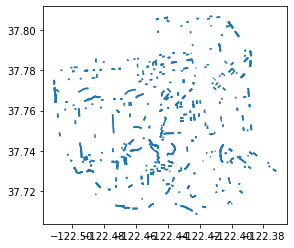

In [41]:
join_attempt.plot()

In [42]:
join_attempt.head()

,CNN,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,element_type,highway,nodes,lanes,maxspeed,name,oneway
1,6710000,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,way,residential,"[65290185, 890045131]","['3', '2']",nan,Beale Street,no
1,6710000,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,way,residential,"[890045131, 65290185]","['2', '3']",nan,Beale Street,no
2,6719000,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,way,secondary,"[65282779, 65335256]","['2', '3']",nan,4th Street,yes
2,6719000,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,way,secondary,"[65282779, 9680491479]",1,nan,4th Street,yes
28,259000,"LINESTRING (-122.39962 37.78079, -122.39908 37...",0,4TH ST,69.00,32.00,27.35,30.12,33.72,way,secondary,"[65282779, 9680491479]",1,nan,4th Street,yes


In [43]:
nodes2 = nodes.reset_index()
col1 = []
coords1 = []
col2 = []
coords2 = []
for node_list in join_attempt['nodes'][1000:1100]:
    n1_id = node_list[0]
    n2_id = node_list[1]
    col1.append(n1_id)
    coords1.append(nodes2[nodes2['osmid'] == n1_id]['geometry'])
    col2.append(n2_id)
    coords2.append(nodes2[nodes2['osmid'] == n2_id]['geometry'])

In [44]:
from shapely.geometry import LineString

In [45]:
linestrings = []

for point1, point2 in zip(coords1, coords2):
    point_test = point1
    linestring = LineString([(point1.x, point1.y), (point2.x, point2.y)])
    linestrings.append(linestring)

Prepare linestrings for visualisation of the results

In [46]:
gdf_linestrings = gpd.GeoDataFrame({'geometry': linestrings})

### 1.10.1 Join attempt result
As it can be shown on the following plot the joined data isn't ideal. We came across many edge cases. For instance if one street crosses another in only one point the data is joined and it's treated as the same street part which obviously is incorrect. 
<br>

This type of situation can be shown on the plot below. 
There are two colors on the plot:
* navy blue - streets from osmnx    
* red - streets from Speed limit compliance


Our goal was to join those two datasets and find corresponding street from osmnx for each record of Speed limi compliance dataset. Unfortunately, this approach wasn't the best but on the other hand we could dive deeper into the data machinery to find the best solution for this problem.

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


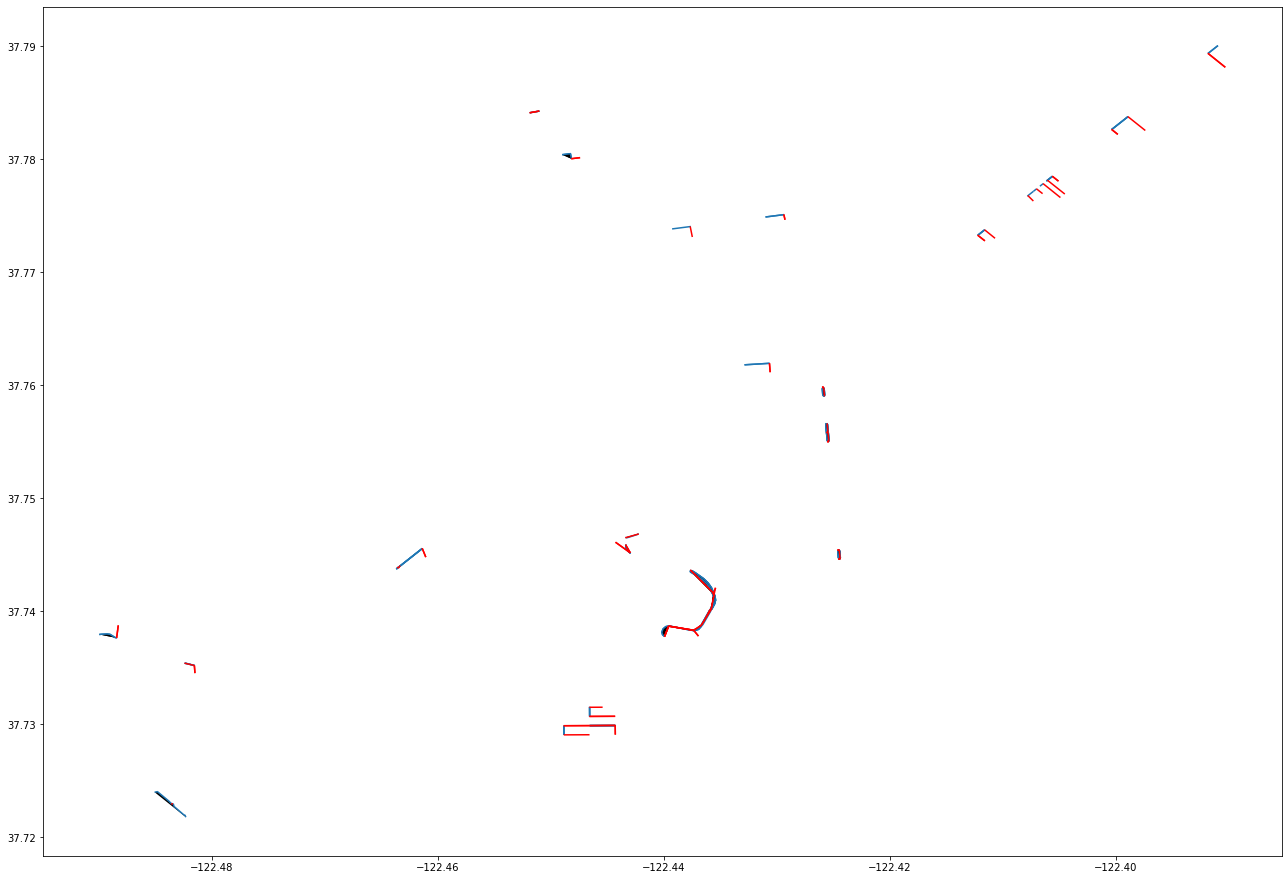

In [47]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
join_attempt.geometry[1000:1100].plot(ax=ax, facecolor='black')
gdf_linestrings.plot(ax=ax, color='red')
plt.tight_layout()

## 1.11 Join data by name of the street
#### We've decided to try another approach to the joining those two datasets.

In both datasets we have `streetname` column but range of values used in each of them aren't the same. 
Edges dataset contains full names of the streets as opposed to the Speed limit compliance dataset where some abbreviations occur such as `ST` instead of `Street` or `AVE` instead of `Avenue`. 

In [49]:
edges.name.value_counts()

Mission Street                                             233
Ocean Avenue                                               199
Geary Boulevard                                            187
California Street                                          173
Fulton Street                                              162
                                                          ... 
[Avenue E, 13th Street]                                      1
Mistral Street                                               1
Sheridan Street                                              1
[Treasure Island Road, Avenue of the Palms, 9th Street]      1
Mirando Way                                                  1
Name: name, Length: 2000, dtype: int64

In [50]:
gdf.STREETNAME.value_counts()

GEARY BLVD        25
TERESITA BLVD     23
MARKET ST         20
3RD ST            19
BAY SHORE BLVD    17
                  ..
HAYES ST           1
STAPLES AVE        1
PAUL AVE           1
LYELL ST           1
TOPEKA AVE         1
Name: STREETNAME, Length: 182, dtype: int64

#### New column with upper case streetnames is created as all column values in the Speed limit compliance is in upper case.
#### It will make easier comparing strings between those columns and perform joining.

In [51]:
edges['upper_name'] = edges['name'].str.upper()

In [52]:
edges['upper_name'].value_counts()

MISSION STREET       233
OCEAN AVENUE         199
GEARY BOULEVARD      187
CALIFORNIA STREET    173
FULTON STREET        162
                    ... 
WRIGHT STREET          1
CARRIE STREET          1
BIRCH STREET           1
STARR KING WAY         1
RODRIGUEZ STREET       1
Name: upper_name, Length: 1761, dtype: int64

Perform join with the upper case street names

In [53]:
join_result = gdf.sjoin(edges, how="inner", predicate='intersects') 

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


In [54]:
join_result['upper_name']

1         BEALE STREET
1         BEALE STREET
2                  NaN
2           4TH STREET
2           4TH STREET
            ...       
608      HOWARD STREET
610      FOLSOM STREET
611                NaN
612                NaN
612    TOWNSEND STREET
Name: upper_name, Length: 1418, dtype: object

## 1.11.1 Further data matching
#### Retrieve only those records from join_result where upper_name (column of streetnames from osmnx edges of San Francisco) includes first part of STREETNAME (column of Speed limit compliance of San Francisco) has values in osmnx edges dataset.

We tried to not match streets that are incorrectly joined and we limited all streets to those which names are in the Speed limit compliance dataset.


In [55]:
# get first part of the name of each record in join_result
names = [x.split(' ')[0] for x in join_result['STREETNAME']]
# create function which checks if value contains any of the retrieved names 
check_if_contains = lambda x: any(map(x.__contains__, names))
# drop records without specified upper_name values
without_nan = join_result.dropna(subset=['upper_name'])

# get only those records where streetnames are valid
result = without_nan[without_nan['upper_name'].apply(check_if_contains)]
# drop duplicated values of CNN
result.drop_duplicates('CNN')

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,highway,maxspeed,length,bridge,access,junction,service,width,tunnel,upper_name
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48,15,29.55,33.88,38,"LINESTRING (-122.39962 37.78079, -122.40184 37...",...,secondary,NaN,65.148,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
28,259000,LINESTRING (-122.39961623244395 37.78079148306...,0,4TH ST,69,32,27.35,30.12,33.72,"LINESTRING (-122.39962 37.78079, -122.39908 37...",...,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37...",...,unclassified,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,26TH STREET
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38782 37...",...,unclassified,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,26TH STREET
5,195101,LINESTRING (-122.38763397457048 37.75155960356...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38763 37.75156, -122.38756 37...",...,primary,NaN,20.449,NaN,NaN,NaN,NaN,NaN,NaN,CESAR CHAVEZ STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,702000,LINESTRING (-122.39689710424506 37.76642996856...,0,16TH ST,94,60.5,30.75,31.39,33.82,"LINESTRING (-122.39690 37.76643, -122.39786 37...",...,residential,NaN,146.152,NaN,NaN,NaN,NaN,NaN,NaN,MISSOURI STREET
601,713000,LINESTRING (-122.40558529539535 37.76590040105...,0,16TH ST,72,21,26.82,28.77,33.07,"LINESTRING (-122.40559 37.76590, -122.40655 37...",...,residential,NaN,145.247,NaN,NaN,NaN,NaN,NaN,NaN,SAN BRUNO AVENUE
603,471000,LINESTRING (-122.4673832314509 37.763989888299...,0,10TH AVE,34.36,7.71,22.12,28.44,33.39,"LINESTRING (-122.46738 37.76399, -122.46725 37...",...,tertiary,NaN,96.854,NaN,NaN,NaN,NaN,NaN,NaN,JUDAH STREET
607,490000,LINESTRING (-122.41127793723784 37.77157867720...,30,10TH ST,24,4,26.35,32.83,37,"LINESTRING (-122.41128 37.77158, -122.40974 37...",...,secondary,25 mph,74.531,NaN,NaN,NaN,NaN,NaN,NaN,BRYANT STREET


### 1.11.2 Plot the result of joining by the `streetname`

E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

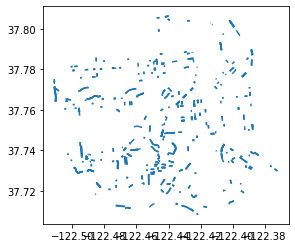

In [56]:
result.plot()

#### We even went further and tried to limit our joined data to not streetnames that are in the column but only for those records where STREETNAME and upper_name are similar to each other.

In [57]:
# where upper_name and STREETNAME columns corresponds to each other
is_streetname_equal_upper_name = []

for idx, row in without_nan.iterrows():
    is_streetname_equal_upper_name.append(row['STREETNAME'].split(' ')[0] in row['upper_name'])

same_street_name = without_nan[is_streetname_equal_upper_name]
same_street_name

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,geometry,...,highway,maxspeed,length,bridge,access,junction,service,width,tunnel,upper_name
28,259000,LINESTRING (-122.39961623244395 37.78079148306...,0,4TH ST,69,32,27.35,30.12,33.72,"LINESTRING (-122.39962 37.78079, -122.39908 37...",...,secondary,NaN,69.368,NaN,NaN,NaN,NaN,NaN,NaN,4TH STREET
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38776 37.75284, -122.38768 37...",...,primary,30 mph,137.642,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
5,195101,LINESTRING (-122.38763397457048 37.75155960356...,30,3RD ST,58.5,25.5,31.26,34.89,38.63,"LINESTRING (-122.38763 37.75156, -122.38756 37...",...,primary,30 mph,137.102,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
15,188101,LINESTRING (-122.38873799832506 37.76304827898...,30,3RD ST,50.5,13.5,30.04,33.91,39.15,"LINESTRING (-122.38874 37.76305, -122.38866 37...",...,primary,30 mph,142.265,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
17,208101,LINESTRING (-122.38958738016719 37.73795539583...,30,3RD ST,15.08,4.52,25.34,33.5,37,"LINESTRING (-122.38959 37.73796, -122.38956 37...",...,primary,30 mph,91.955,NaN,NaN,NaN,NaN,NaN,NaN,3RD STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2175101,LINESTRING (-122.44895044319458 37.71388616824...,35,ALEMANY BLVD,69,25,36.9,39.36,43.52,"LINESTRING (-122.44895 37.71389, -122.44899 37...",...,primary,35 mph,334.561,NaN,NaN,NaN,NaN,NaN,NaN,ALEMANY BOULEVARD
575,2160101,LINESTRING (-122.43119165775887 37.73056751319...,35,ALEMANY BLVD,25,3.5,31.52,37.8,42.71,"LINESTRING (-122.43119 37.73057, -122.43128 37...",...,primary,35 mph,209.637,NaN,NaN,NaN,NaN,NaN,NaN,ALEMANY BOULEVARD
587,1203000,LINESTRING (-122.42996167469457 37.75476123055...,0,22ND ST,42.79,11.24,22.46,28.57,32.99,"LINESTRING (-122.42996 37.75476, -122.43218 37...",...,residential,NaN,194.291,NaN,NaN,NaN,NaN,NaN,NaN,22ND STREET
587,1203000,LINESTRING (-122.42996167469457 37.75476123055...,0,22ND ST,42.79,11.24,22.46,28.57,32.99,"LINESTRING (-122.42996 37.75476, -122.43218 37...",...,residential,NaN,194.291,NaN,NaN,NaN,NaN,NaN,NaN,22ND STREET


E:\Anaconda3\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
E:\Anaconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

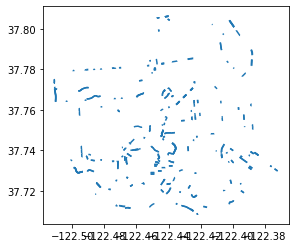

In [58]:
same_street_name.plot()

#### 1. This approach didn't give satisfactional results so next steps and ideas had to be performed on the data.